In [1]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 48.9 MB/s eta 0:00:00


In [5]:
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [6]:

# this function generates a cluser plot from the kmeans model
# kmeans_model_file -> this is the string path of the kmeans joblib file
# input_file -> this is the string path to the .npz input file
# data_x_var -> this is the string attribute in the input file used on the x axis
# data_y_var -> this is the string attribute in the input file used on the y axis
# figsize -> this is the tuple figsize of the plot
# title -> this is the string title of the plot
# x_title -> this is the string title of the x-axis on the plot
# y_title -> this is the string title of the y-axis on the plot
# x-lim -> this is the int of the bounds of the x-axis of the plot
def generate_cluster_plot(kmeans_model_file, input_file, data_x_var, data_y_var, figsize, title, x_title, y_title, x_lim):
  # Load the existing KMeans model
  kmeans_model = load(kmeans_model_file)

  # Load data
  data = np.load(input_file)
  x = data[data_x_var]
  y = data[data_y_var]

  # combine the x and y data
  X = np.vstack([x,y]).T

  # Then fit the model
  kmeans_model.fit(X)

  # Set the size of the plot here
  plt.figure(figsize=figsize)

  # Create the color palette (this one is ligher for black cluster text later)
  palette = sns.color_palette("tab20", len(np.unique(kmeans_model.labels_)))

  # Create scatterplot with color per cluster
  ax = sns.scatterplot(
      x=x,
      y=y,
      hue=kmeans_model.labels_,
      palette=palette,
      alpha=0.5,
      legend=False,
      s=7
  )

  # Get the cluster centroids from the model and the number of clusters
  centroids = kmeans_model.cluster_centers_
  num_clusters = len(centroids)

  # Plot each centroid with matching cluster color and label
  for i in range(num_clusters):
      # Plot centroids using seaborn scatter
      plt.scatter(
          centroids[i, 0],
          centroids[i, 1],
          c=[palette[i]],
          s=150,
          marker='o',
          edgecolors='black',
          linewidths=1.5
      )

      # Finally plot the cluster number over each centroid circle
      plt.text(
          centroids[i, 0],
          centroids[i, 1],
          str(i),
          fontsize=7,
          fontweight='bold',
          color='black',
          ha='center',
          va='center'
      )


  # Labels and Titles
  plt.xlabel("K-means Coefficient", fontsize= 14, fontweight='bold', labelpad=15)
  plt.ylabel("Movie Indicies", fontsize= 14, fontweight='bold', labelpad=15)
  plt.title("Movie K-means Clustering Scatterplot", fontsize=16, fontweight='bold', pad=25)
  # also limit the x axis to reduce outlier influence
  plt.xlim(-x_lim, x_lim)

  plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


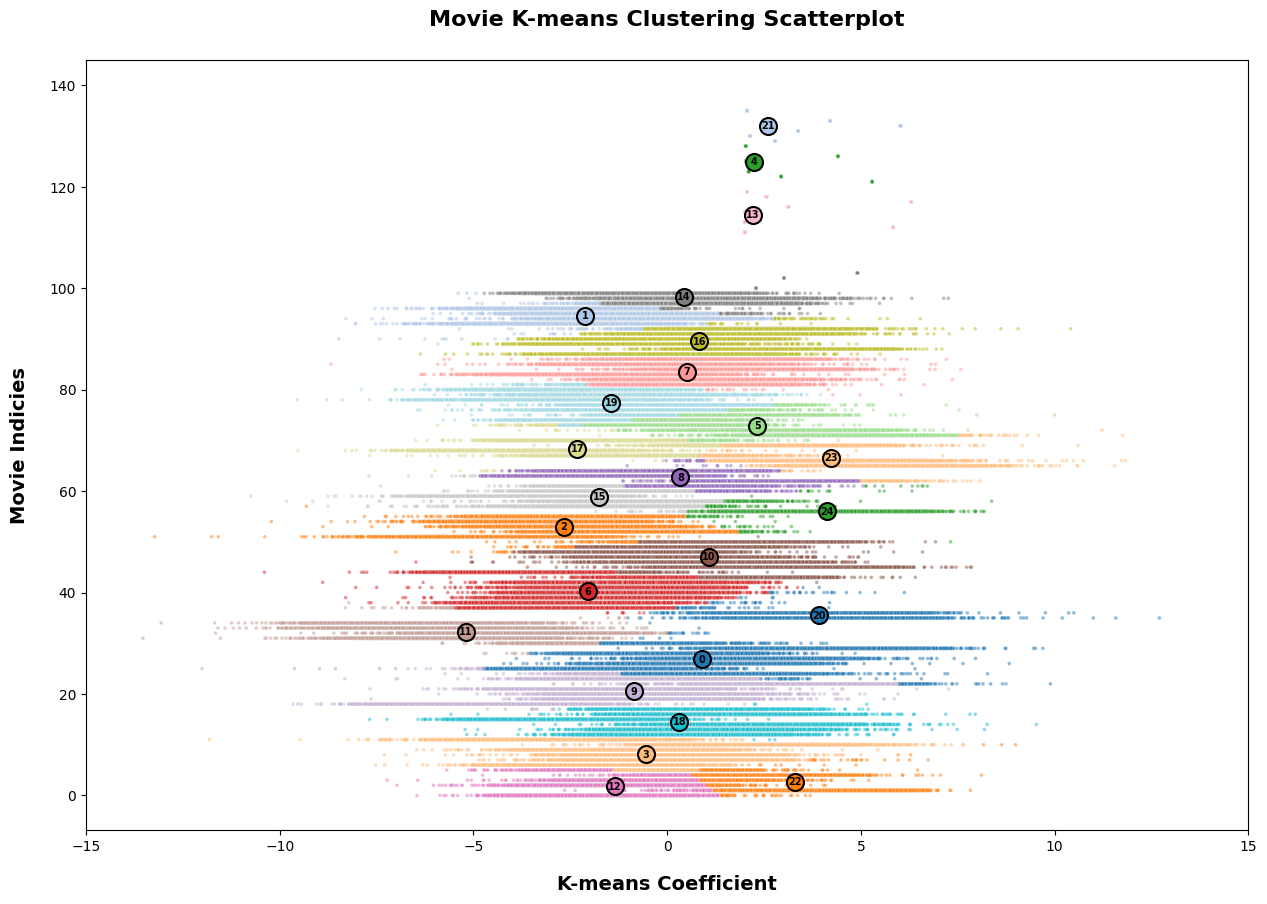

In [7]:
generate_cluster_plot("kmeans_model.joblib", 'kmeans_input.npz', 'data',
                      'indices', (15,10), "Movie K-means Clustering Scatterplot",
                      "K-means Coefficient", "Movie Indicies", 15)